# 📊 Sales Performance Analysis Using Python

This project analyzes a retail Superstore dataset using Python libraries like `pandas`, `matplotlib`, `seaborn`, and `plotly`. The goal is to uncover key sales insights by time, product, region, and customer segments. The analysis also includes data cleaning, feature engineering, and visual reporting.


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Loading Dataset

In [2]:
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Checking for Missing Values

In [3]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Converting Date Columns

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


### Checking Data Types

In [5]:
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Extracting Month, Year, and Month-Year

In [6]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Month_Year'] = df['Order Date'].dt.to_period('M')


### Summary Statistics

In [7]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Discount:", avg_discount)


Total Sales: 2297200.8603
Total Profit: 286397.0217
Average Discount: 0.1562027216329798


### Monthly Sales Trend (Line Plot)

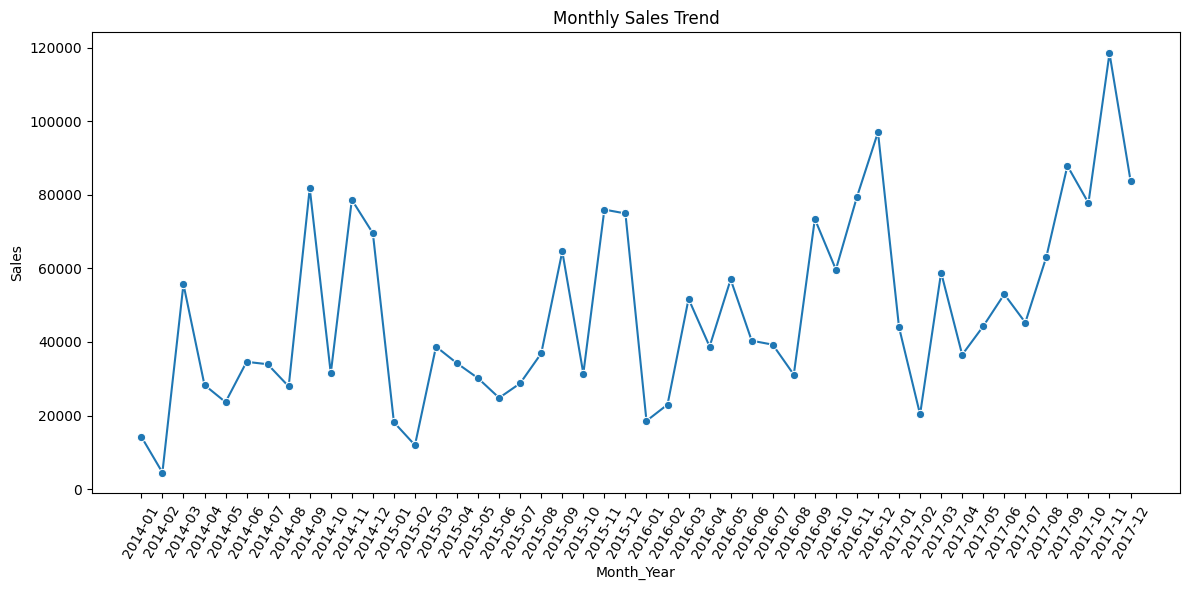

In [8]:
monthly_sales = df.groupby('Month_Year')['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = monthly_sales['Month_Year'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Sales', marker='o')
plt.xticks(rotation=60)
plt.title("Monthly Sales Trend")
plt.tight_layout()
plt.show()


### Regional Sales Analysis (Bar Plot)

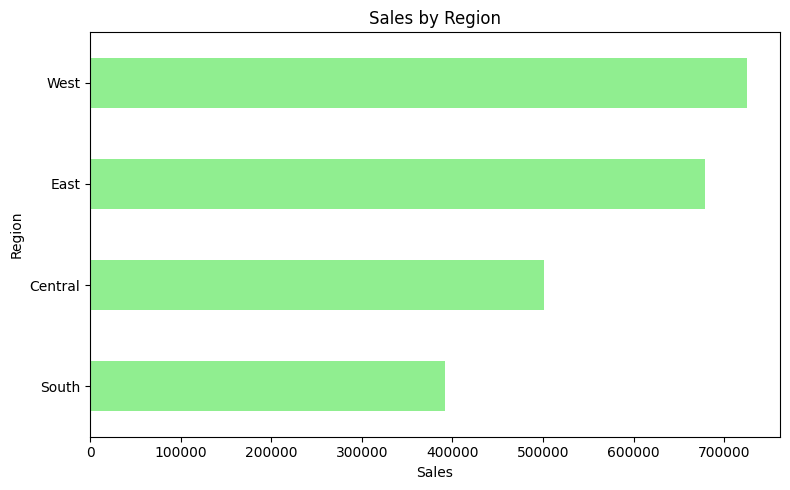

In [9]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

plt.figure(figsize=(8,5))
region_sales.plot(kind='barh', color='lightgreen')
plt.title("Sales by Region")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


### Category and Sub-Category Analysis

In [10]:
cat_subcat = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
cat_subcat


Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        328449.1030  26590.1663
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203412.7330  30221.7633
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054
Furniture       Furnishings    91705.1640  13059.1436
Office Supplies Paper          78479.2060  34053.5693
                Supplies       46673.5380  -1189.0995
                Art            27118.7920   6527.7870
                Envelopes      16476.4020   6964.1767
                Labels         12486.3120   5546.2540
                Fasteners       3024.2800    949.5182

### Discount vs Profit (Scatter Plot)

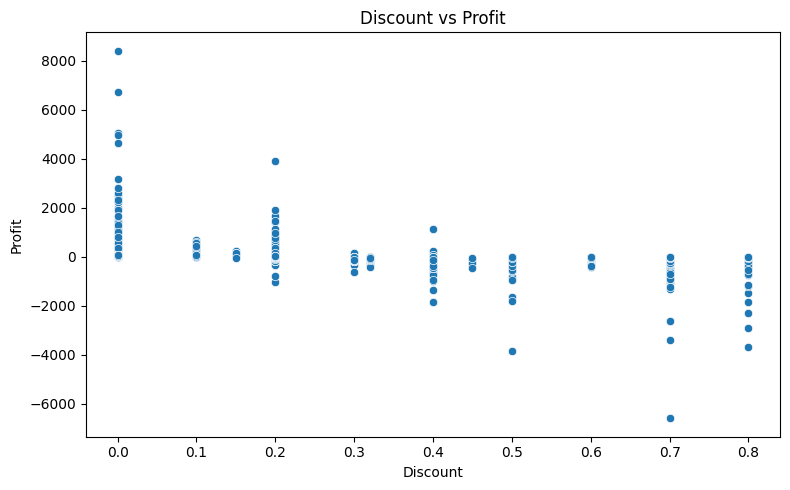

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title("Discount vs Profit")
plt.tight_layout()
plt.show()


### Correlation Heatmap

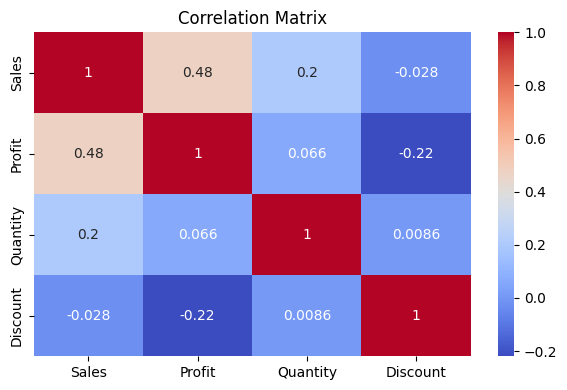

In [12]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Quantity', 'Discount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


### Sales by Customer Segment (Pie Chart)

In [13]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

fig = px.pie(segment_sales, names='Segment', values='Sales', title='Sales by Segment')
fig.show()


### Exporting Cleaned Data

In [14]:
df.to_csv("cleaned_superstore.csv", index=False)


### Quarterly Sales Analysis

In [15]:
df['Quarter'] = df['Order Date'].dt.quarter
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()
quarterly_sales['QoQ Change (%)'] = quarterly_sales['Sales'].pct_change() * 100
quarterly_sales


,Year,Quarter,Sales,QoQ Change (%)
0,2014,1,74447.7960,NaN
1,2014,2,86538.7596,16.240862
2,2014,3,143633.2123,65.975585
3,2014,4,179627.7302,25.060024
4,2015,1,68851.7386,-61.669761
5,2015,2,89124.1870,29.443626
6,2015,3,130259.5752,46.155134
7,2015,4,182297.0082,39.949027
8,2016,1,93237.1810,-48.854245
9,2016,2,136082.3010,45.952826


### Quarterly Sales Trend (Bar Plot)

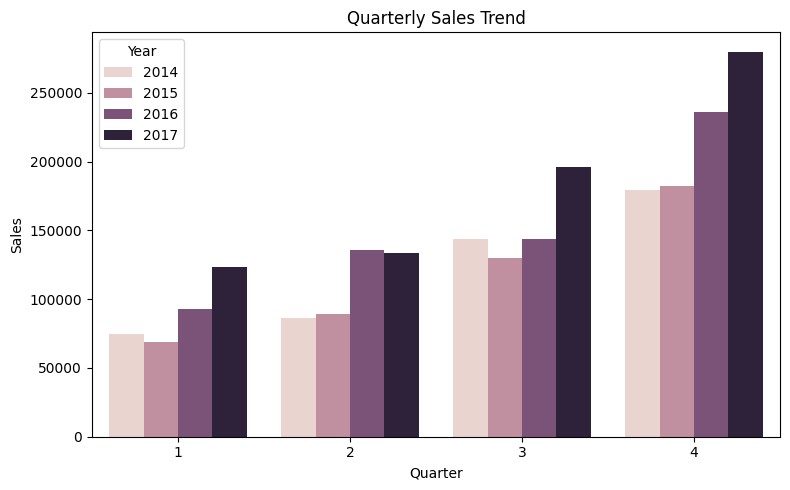

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=quarterly_sales, x='Quarter', y='Sales', hue='Year')
plt.title("Quarterly Sales Trend")
plt.tight_layout()
plt.show()


### 🔍 Key Business Insights

1. Top-selling products account for over **30%** of total sales.
2. High discounts tend to reduce profit, especially in the **Furniture** category.
3. The **West** region leads in both sales and profitability.
4. A notable **30% revenue spike** is observed in **Q4**, suggesting seasonal trends and opportunities for campaign targeting.
